In [1]:
%load_ext tikzmagic
%matplotlib inline

# 상관관계

어떤 데이터의 값이 증가할 때 다른 데이터의 값이 그에 따라 같이 증가하거나 혹은 반대로 감소하는 경향이 있을 때 두 데이터는 <b>상관관계가 있다(correlated)</b>고 한다.

다음 데이터는 보스턴 외곽에 있는 여러 지역(county)의 주택 가격에 대한 데이터다.

In [2]:
import statsmodels.api as sm

df = sm.datasets.get_rdataset("Boston", "MASS").data
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


각 열이 뜻하는 바는 다음과 같다.

* crim: 범죄율
* zn: 25,000평방피트를 초과하는 거주지역 비율
* indus: 비소매상업지역 면적의 비율
* chas: 찰스강의 경계에 위치한 경우는 1, 아니면 0
* nox: 일산화질소 농도
* rm: 주택당 방 수
* age: 1940년 이전에 건축된 주택의 비율
* dis: 직업센터의 거리
* rad: 방사형 고속도로까지의 거리
* tax: 재산세율
* ptratio: 학생/교사 비율
* black: 인구 중 흑인 비율
* lstat: 인구 중 하위 계층 비율
* medv: 해당 지역의 주택가격 중앙값






스캐터플롯에서 볼 수 있듯이 주택가격 medv 값은 방의 개수 rm가 증가할 수록 커지는 경향이 있다. 이 때는 양의 상관관계를 가진다고 한다.

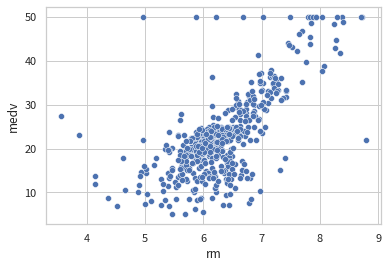

In [3]:
import seaborn as sns

sns.scatterplot(x="rm", y="medv", data=df)
plt.show()

반대로 하위 계층 비율 lstat이 증가하면 주택가격은 떨어지는 경향이 있다. 이 때는 음의 상관관계를 가진다고 한다.

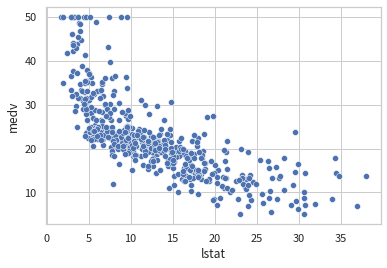

In [4]:
sns.scatterplot(x="lstat", y="medv", data=df)
plt.show()

방의 개수와 흑인 비율은 어떠한 상관관계도 보기 어렵다. 이 때는 상관관계가 거의 없다고 한다.

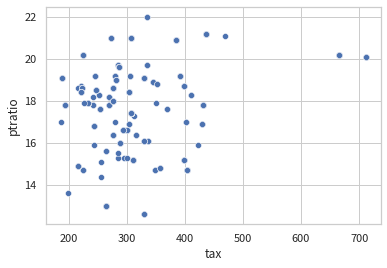

In [5]:
sns.scatterplot(x="tax", y="ptratio", data=df)
plt.show()

## 상관계수

두 데이터 사이의 상관관계의 정도를 정량적으로 수치화한 것을 <b>상관계수(correlation coefficient)</b>라고 한다. 상관계수에도 여러가지 종류가 있지만 일반적으로 그냥 상관계수라고 하면 두 데이터 사이의 선형 상관관계를 계산하는 <b>피어슨 상관계수(Pearson correlation coefficient)</b>를 뜻한다.

데이터 $x$와 $y$ 사이의 (피어슨) 상관계수 $r_{xy}$는 다음 공식으로 계산한다.

$$
r_{xy} = \dfrac{s_{xy}}{\sqrt{s^2_{x} \cdot s^2_{y}}}
$$

이 식에서 $s_{x}^2$, $s_{y}^2$, $s_{xy}$는 각각 $x$의 분산(variance), $y$의 분산, $x$와 $y$ 사이의 공분산(covariance)을 뜻하며 다음 공식으로 계산한다.

$$
s_{x} = \dfrac{1}{N}\sum_{i=1}^N (x_i - \bar{x})^2
$$

$$
s_{y} = \dfrac{1}{N}\sum_{i=1}^N (y_i - \bar{y})^2
$$

$$
s_{xy} = \dfrac{1}{N}\sum_{i=1}^{N} (x_i-\bar{x})(y_i-\bar{y})
$$

위 식에서 $\bar{x}$, $\bar{x}$는 각각 $x$, $y$의 평균을 뜻한다.

상관계수는 다음과 같은 성질이 있다.

* -1보다 같거나 크고 1보다 같거나 작다. 
* 상관계수의 값이 양수이면 양의 상관관계를 가진다.
* 상관계수의 값이 음수이면 음의 상관관계를 가진다.
* 상관관계가 강할수록 상관계수의 절대값이 커진다.
* 완전히 같은 데이터 사이의 상관계수는 1이다.
* 절대값이 완전히 같고 부호가 반대인 데이터 사이의 상관계수는 -1이다.


다음 그림에서 이러한 성질을 확인할 수 있다.

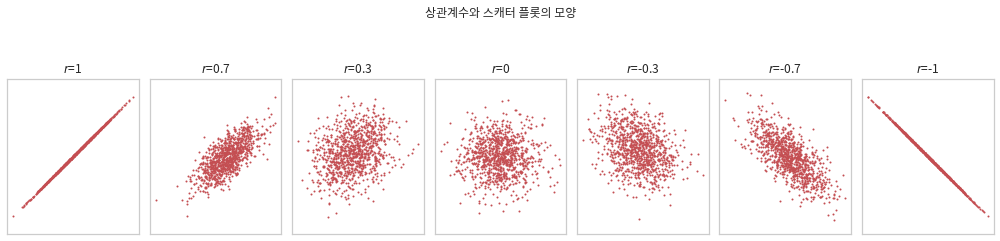

In [6]:
np.random.seed(0)
corrs = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(corrs) * 2, 3))
for i, r in enumerate(corrs):
    x, y = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], 1000).T
    plt.subplot(1, len(corrs), i + 1)
    plt.plot(x, y, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    plt.title(r"$r$={}".format(r))

plt.suptitle("상관계수와 스캐터 플롯의 모양", y=1.1)
plt.tight_layout()
plt.show()

하지만 스캐터 플롯의 기울기와 상관관계는 아무런 상관이 없다.

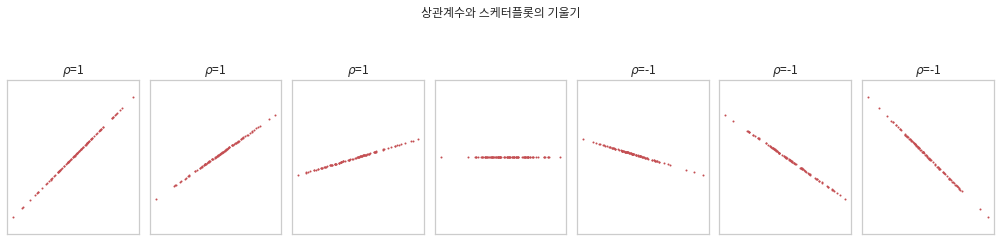

In [7]:
np.random.seed(1)
slope = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(slope) * 2, 3))
for i, s in enumerate(slope):
    plt.subplot(1, len(slope), i + 1)
    x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 100).T
    y2 = s * y
    plt.plot(x, y2, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    if s > 0:
        plt.title(r"$\rho$=1")
    if s < 0:
        plt.title(r"$\rho$=-1")

plt.suptitle("상관계수와 스케터플롯의 기울기", y=1.1)
plt.tight_layout()
plt.show()

scipy 패키지의 stats 서브패키지는 상관계수를 계산하는 `pearsonr` 함수를 제공한다. `pearsonr` 함수로 보스턴 주택가격의 중앙값 medv와 방의 개수 rm 사이의 상관계수를 구하면 다음과 같이 약 0.695가 나온다. 두번째 나오는 수치는 뒤에서 설명할 상관계수 검정의 유의확률이다.

In [8]:
from scipy.stats import pearsonr

pearsonr(df.medv, df.rm)

(0.6953599470715394, 2.4872288710071593e-74)

데이터 간의 상관계수를 표시할 때는 상관계수행렬을 사용하는 경우가 많다. 예를 들어 데이터 $x, y, z$가 있을 때 이 데이터 사이의 상관관계계수들은 다음과 같은 행렬 형태로 표시한다.

$$ 
\begin{bmatrix}
r_{xx} & r_{xy} & r_{xz} \\
r_{yx} & r_{yy} & r_{yz} \\
r_{zx} & r_{zy} & r_{zz} \\
\end{bmatrix}
$$

numpy 패키지의 `corrcoef` 함수를 사용하면 상관계수 행렬을 계산할 수 있다. 예를 들어 보스턴 주택가격의 중앙값 medv와 방의 개수 rm 사이의 상관계수 행렬은 다음과 같이 계산한다.

In [9]:
import numpy as np

np.corrcoef(df.medv, df.rm)

array([[1.        , 0.69535995],
       [0.69535995, 1.        ]])

즉

$$
\begin{bmatrix}
r_{\text{medv}, \text{medv}} & r_{\text{medv}, \text{rm}} \\
r_{\text{rm}, \text{medv}} & r_{\text{rm}, \text{rm}} \\
\end{bmatrix}
=
\begin{bmatrix}
1 & 0.69535995 \\
0.69535995 & 1 \\
\end{bmatrix}
$$
이 된다.


pandas 데이터프레임은 데이터 사이의 상관계수 행렬을 계산하는 `corr` 메서드를 제공한다.

In [10]:
df_corr = df.corr()
df_corr.iloc[:6, :6]

,crim,zn,indus,chas,nox,rm
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000


seaborn 패키지는 이러한 상관계수 행렬의 전체 형상을 좀 더 쉽게 인식할 수 있도록 시각화하는 `heatmap` 함수를 제공한다.

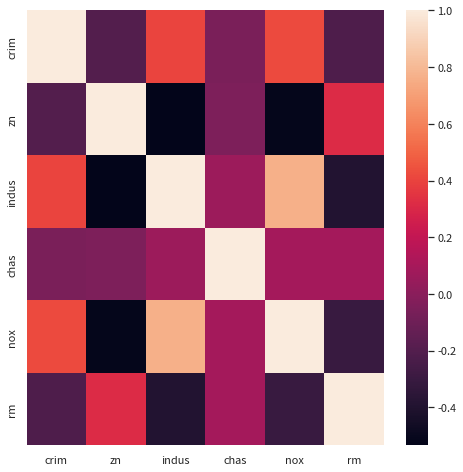

In [11]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_corr.iloc[:6, :6])
plt.show()

`heatmap` 함수는 여러가지 시각화 옵션을 제공한다.

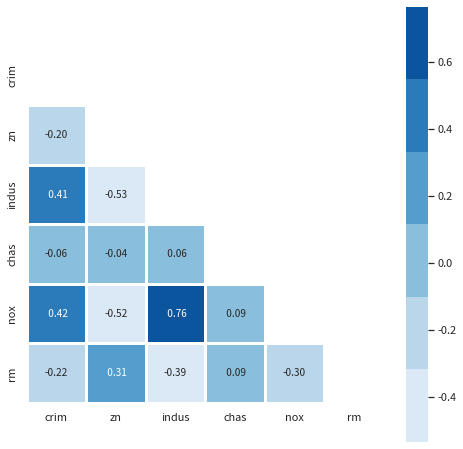

In [12]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_corr.iloc[:6, :6], mask=np.triu(df_corr.iloc[:6, :6]),
            square=True, linewidths=3, annot=True, fmt="5.2f",
            cmap=sns.color_palette("Blues"))
plt.show()

이 자료에서 주택가격인 medv 데이터와 다른 데이터간의 상관계수 순위만 계산하면 다음과 같이 방의 개수 rm과 가장 상관계수가 높다는 것을 알 수 있다.

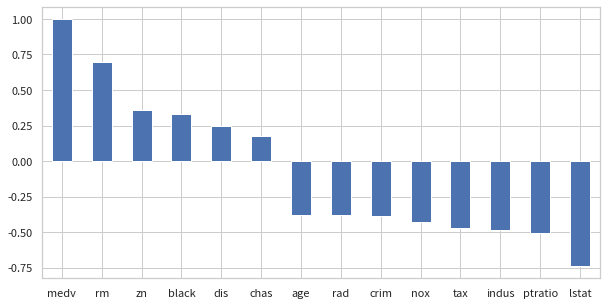

In [13]:
medv_corr = df_corr["medv"].sort_values(ascending=False)
medv_corr.plot(kind="bar", figsize=(10, 5), rot=0)
plt.show()

## 상관계수 검정

확률변수의 표본 데이터로부터 계산한 상관계수는 실제 두 확률변수의 상관계수와 다를 수 있다. 따라서 상관계수를 계산한 후에도 이 상관계수가 어느정도의 신뢰성을 가지고 있는지 검정을 통해 확인해야 한다. 상관계수의 값에 대한 검정은 기본적으로 상관계수가 0인 경우를 귀무가설로 한다.

$$ H_0 : r_{xy} = 0 $$

따라서 검정 결과인 유의확률이 아주 작은 값이 나오면 상관관계가 유의하게 존재하는 것이고 그렇지 않으면 상관관계가 없다($r_{xy}=0$)고 보는 것이 옳다.

scipy 패키지의 stats 서브패키지에 제공하는 상관계수 계산 함수 `pearsonr`는 두번째 결과값으로 위 귀무가설에 대한 유의확률을 제공한다. 예를 들어 보스턴 주택가격의 중앙값 medv와 방의 개수 rm 사이의 상관계수를 구할 때 나오는 두번째 수치인 $2.487\times 10^{-74}$가 두 데이터간의 상관관계가 없을 귀무가설 검정의 유의확률이다. 수치가 아주 작으므로 이 귀무가설은 기각한다. 즉, 상관계수가 실제로는 0일 가능성은 없다.

In [14]:
pearsonr(df.medv, df.rm)

(0.6953599470715394, 2.4872288710071593e-74)

그런데 다른 두 데이터 chas와 crim 사이의 상관관계를 계산하면 다음과 같은 결과가 나온다.

In [15]:
pearsonr(df.chas, df.crim)

(-0.055891582222241484, 0.20943450153515702)

즉 상관계수가 값이 -0.05589라는 0 아닌 값이 나오지만 상관계수가 0이라는 귀무가설에 대한 유의확률이 20%나 되기 때문에 실제로는 상관계수의 값이 0일 가능성이 아주 높다. 즉 두 데이터 chas와 crim는 서로 상관관계가 없는 가능성이 높다.

## 비선형 상관관계

어떤 데이터 $x$의 값이 증가할 때 다른 데이터 $y$의 값이 반드시 선형적으로 증가해야지만 서로 상관관계가 있는 것은 아니다. 두 값 사이에 비선형적인 함수 관계가 성립하는 경우에도 상관관계가 있다고 한다.

$$ y \approx f(x) $$

예를 들어 다음 그림에서 표시하는 두 데이터들은 모두 비선형적인 상관관계를 가지고 있다. 


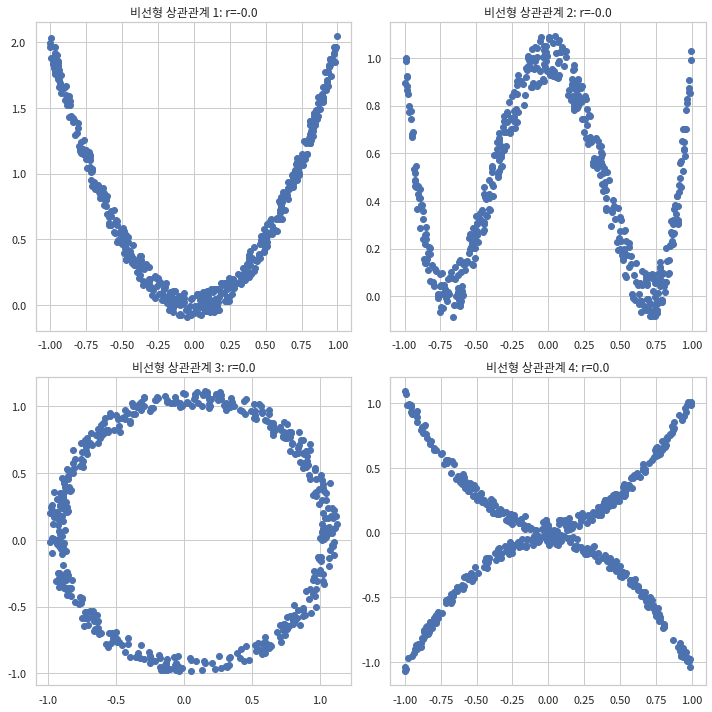

In [16]:
n = 500
plt.figure(figsize=(10, 10))
np.random.seed(1)
plt.subplot(221)
x1 = np.random.uniform(-1, 1, n)
y1 = 2*x1**2 + np.random.uniform(-0.1, 0.1, n)
plt.scatter(x1, y1)
r1 = sp.stats.pearsonr(x1, y1)[0]
plt.title(r"비선형 상관관계 1: r={:3.1f}".format(r1))
plt.subplot(222)
x2 = np.random.uniform(-1, 1, n)
y2 = 4*(x2**2-0.5)**2 + 0.1 * np.random.uniform(-1, 1, n)
plt.scatter(x2, y2)
r2 = sp.stats.pearsonr(x2, y2)[0]
plt.title(r"비선형 상관관계 2: r={:3.1f}".format(r2))
plt.subplot(223)
x3 = np.random.uniform(-1, 1, n)
y3 = np.cos(x3 * np.pi) + np.random.uniform(0, 1/8, n)
x3 = np.sin(x3 * np.pi) + np.random.uniform(0, 1/8, n)
plt.scatter(x3, y3)
r3 = sp.stats.pearsonr(x3, y3)[0]
plt.title(r"비선형 상관관계 3: r={:3.1f}".format(r3))
plt.subplot(224)
x4 = np.random.uniform(-1, 1, n)
y4 = (x4**2 + np.random.uniform(0, 0.1, n)) * \
    np.array([-1, 1])[np.random.random_integers(0, 1, size=n)]
plt.scatter(x4, y4)
r4 = sp.stats.pearsonr(x4, y4)[0]
plt.title(r"비선형 상관관계 4: r={:3.1f}".format(r4))
plt.tight_layout()
plt.show()

하지만 위에서 표시한 비선형 상관관계 데이터에 대해 피어슨 상관계수를 계산하면 모두 0에 가까운 값이 나온다. 피어슨 상관계수는 두 데이터 사이의 선형적인 상관관계만을 고려하기 때문이다.

이러한 단점을 극복하기 위해 다음과 같은 여러가지 다른 정의를 가진 상관계수들이 고안되었다.

* 스피어만(Spearman) 상관계수 
* 켄달 타우(Kendall's $\tau$)

이러한 상관계수는 각각의 특성을 가지고 있으므로 필요한 경우 상황에 맞게 사용할 수 있다. scipy 패키지의 stats 서브패키지는 이러한 상관계수를 위한 함수들을 제공한다.

* `spearmanr` : 스피어만 상관계수 계산
* `kendalltau` : 켄달 타우 계산


## 앤스콤 데이터

또한 피어슨 상관계수가 같더라도 데이터의 관계는 여러가지 경우가 있을 수 있다는 점에도 유의해야 한다. 다음은 프랭크 앤스콤(Frank Anscombe)의 논문에 예시된 데이터다. 이 데이터는 서로 다른 4가지 종류의 2차원 데이터셋을 포함하는데 4종류 데이터셋 모두 상관계수가 약 0.816로 동일하다.

In [17]:
anscombe = sm.datasets.get_rdataset("anscombe").data
anscombe

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


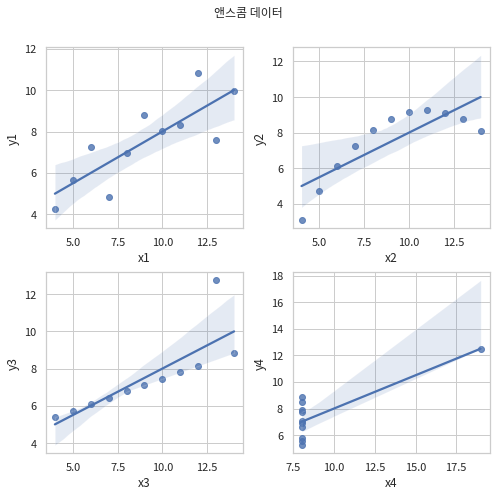

In [18]:
plt.figure(figsize=(7, 7))
plt.subplot(221)
sns.regplot(x="x1", y="y1", data=anscombe)
plt.subplot(222)
sns.regplot(x="x2", y="y2", data=anscombe)
plt.subplot(223)
sns.regplot(x="x3", y="y3", data=anscombe)
plt.subplot(224)
sns.regplot(x="x4", y="y4", data=anscombe)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("앤스콤 데이터")
plt.show()